In [455]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Step 1. Open the data file and study the general information
### Project description
You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

In [456]:
calls_df = pd.read_csv('./datasets/moved_megaline_calls.csv')
internet_df = pd.read_csv('./datasets/moved_megaline_internet.csv')
messages_df = pd.read_csv('./datasets/moved_megaline_messages.csv')
plans_df = pd.read_csv('./datasets/moved_megaline_plans.csv')
users_df = pd.read_csv('./datasets/moved_megaline_users.csv')


## Step 2. Prepare the data

## Description of the plans
Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

### Calls

In [457]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%d')
calls_df['duration'] = np.ceil(calls_df['duration'])

calls_df.info()
calls_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0


In [458]:
calls_df['month'] = calls_df['call_date'].dt.month

calls_by_user_per_month = calls_df.pivot_table(index='user_id', columns=['month'], values='duration', aggfunc='count', fill_value=0)
calls_by_user_per_month = calls_by_user_per_month.reindex(users_df['user_id'].unique(), fill_value=0)

calls_by_user_per_month

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,16
1001,0,0,0,0,0,0,0,27,49,65,64,56
1002,0,0,0,0,0,0,0,0,0,11,55,47
1003,0,0,0,0,0,0,0,0,0,0,0,149
1004,0,0,0,0,21,44,49,49,42,61,54,50
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,52,75,61,65
1496,0,0,0,0,0,0,0,18,52,46,39,40
1497,0,0,0,0,0,0,0,0,0,0,0,54


In [459]:
duration_of_calls_by_user_per_month = calls_df.pivot_table(index='user_id', columns=['month'], values='duration', aggfunc='sum', fill_value=0)
duration_of_calls_by_user_per_month = duration_of_calls_by_user_per_month.reindex(users_df['user_id'].unique(), fill_value=0)

duration_of_calls_by_user_per_month

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,124
1001,0,0,0,0,0,0,0,182,315,393,426,412
1002,0,0,0,0,0,0,0,0,0,59,386,384
1003,0,0,0,0,0,0,0,0,0,0,0,1104
1004,0,0,0,0,193,275,381,354,301,365,476,427
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,302,610,361,492
1496,0,0,0,0,0,0,0,122,414,317,308,294
1497,0,0,0,0,0,0,0,0,0,0,0,300


### Internet

In [460]:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format='%Y-%m-%d')
internet_df['month'] = internet_df['session_date'].dt.month

internet_df.info()
internet_df.sample(5, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB


,id,user_id,session_date,mb_used,month
102423,1490_238,1490,2018-10-15,373.01,10
12472,1060_181,1060,2018-09-14,875.38,9
91959,1426_53,1426,2018-12-29,627.48,12
42208,1187_385,1187,2018-09-20,132.80,9
64201,1294_122,1294,2018-10-29,397.70,10


In [461]:
internet_by_user_per_month = internet_df.pivot_table(index='user_id', columns='month', values='mb_used', aggfunc='sum', fill_value=0)
internet_by_user_per_month = internet_by_user_per_month.reindex(users_df['user_id'].unique(), fill_value=0)

internet_by_user_per_month

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1901.47
1001,0.0,0.00,0.00,0.00,0.00,0.00,0.00,6919.15,13314.82,22330.49,18504.30,19369.18
1002,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6552.01,19345.08,14396.24
1003,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,27044.14
1004,0.0,0.00,0.00,0.00,6547.21,20672.82,24516.62,27981.74,18852.72,14541.63,21850.78,21389.29
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22981.37,26899.41,24912.78,24097.40
1496,0.0,0.00,0.00,0.00,0.00,0.00,0.00,8605.66,16389.27,14287.36,8547.36,16438.99
1497,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11106.55


### Messages

In [462]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y-%m-%d')

messages_df.info()
messages_df.sample(5, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


,id,user_id,message_date
58331,1369_132,1369,2018-12-27
24196,1145_51,1145,2018-07-11
9284,1069_42,1069,2018-12-03
44214,1293_1181,1293,2018-10-06
57006,1362_72,1362,2018-05-25


In [463]:
messages_by_user_per_month = messages_df
messages_by_user_per_month['month'] = messages_df['message_date'].dt.month
messages_by_user_per_month = messages_by_user_per_month.pivot_table(index='user_id', columns='month', values='message_date', aggfunc='count', fill_value=0)
messages_by_user_per_month = messages_by_user_per_month.reindex(users_df['user_id'].unique(), fill_value=0)

messages_by_user_per_month.head(10)

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,11
1001,0,0,0,0,0,0,0,30,44,53,36,44
1002,0,0,0,0,0,0,0,0,0,15,32,41
1003,0,0,0,0,0,0,0,0,0,0,0,50
1004,0,0,0,0,7,18,26,25,21,24,25,31
1005,0,0,0,0,0,0,0,0,0,0,0,11
1006,0,0,0,0,0,0,0,0,0,0,15,139
1007,0,0,0,0,0,0,0,51,47,59,48,50
1008,0,0,0,0,0,0,0,0,0,21,37,26


### Plans

In [464]:
plans_df['plan_name'] = plans_df['plan_name'].astype('category')

plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### Users

In [465]:
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format='%Y-%m-%d')
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], format='%Y-%m-%d')
users_df['plan'] = users_df['plan'].astype('category')
users_df.set_index('user_id', inplace=True, drop=False)

users_df.info()
users_df.sample(5, random_state=42)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1000 to 1499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    category      
 7   churn_date  34 non-null     datetime64[ns]
dtypes: category(1), datetime64[ns](2), int64(2), object(3)
memory usage: 31.9+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
user_id,,,,,,,,
1361,1361,Jacelyn,Hoffman,45,"Birmingham-Hoover, AL MSA",2018-04-14,surf,NaT
1073,1073,Grady,Crawford,30,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-04-06,surf,NaT
1374,1374,Ching,Watts,55,"Louisville/Jefferson County, KY-IN MSA",2018-02-14,surf,NaT
1155,1155,Claude,Hahn,19,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-02-21,ultimate,NaT
1104,1104,Thurman,Stephens,20,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-12-23,ultimate,NaT


# Monthly user revenue
Now let's calculate monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

In [466]:

max_month = 13
months = range(1, max_month)

monthly_user_revenue = pd.DataFrame(index=users_df.index, columns=months)
monthly_user_revenue.fillna(0, inplace=True)
monthly_user_revenue[['user_id', 'plan', 'churn_date']] = users_df[['user_id', 'plan', 'churn_date']]

monthly_user_revenue = monthly_user_revenue.merge(plans_df, left_on='plan', right_on='plan_name', how='left')
monthly_user_revenue.set_index('user_id', inplace=True, drop=False)

for month in months:
    monthly_user_revenue[month] = ((duration_of_calls_by_user_per_month[month] - monthly_user_revenue['minutes_included']).clip(lower=0)) * monthly_user_revenue['usd_per_minute']
    monthly_user_revenue[month] += ((messages_by_user_per_month[month] - monthly_user_revenue['messages_included']).clip(lower=0)) * monthly_user_revenue['usd_per_message']
    monthly_user_revenue[month] += np.ceil((internet_by_user_per_month[month] - monthly_user_revenue['mb_per_month_included']).clip(lower=0) / 1024) * monthly_user_revenue['usd_per_gb']
    monthly_user_revenue[month] += monthly_user_revenue['usd_monthly_pay']

churned_users = monthly_user_revenue.query('not churn_date.isnull()')

# we assume that we don't get money from users who have already left
for user_id in churned_users.index:
    for month in range(churned_users.loc[user_id, 'churn_date'].month + 1, max_month):
        monthly_user_revenue.loc[user_id, month] = 0

monthly_user_revenue

,1,2,3,4,5,6,7,8,9,10,...,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
user_id,,,,,,,,,,,,,,,,,,,,,
1000,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.00,...,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate
1001,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,90.09,...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
1002,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.00,...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
1003,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.00,...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
1004,20.0,20.0,20.0,20.0,20.0,80.0,110.0,150.0,60.0,20.00,...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,100.0,143.30,...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
1496,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,40.0,20.00,...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
1497,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.00,...,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate


# Step 3. Analyze the data
Describe the customers' behavior. Find the minutes, texts, and volume of data the users of each plan require per month. Calculate the mean, variance, and standard deviation. Plot histograms. Describe the distributions.

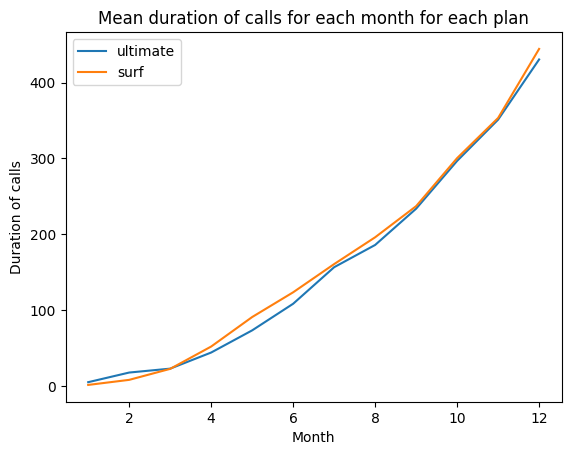

In [491]:
duration_of_calls_by_user_per_month['plan'] = users_df['plan']


#plot mean duration of calls for each month for each plan
for plan in duration_of_calls_by_user_per_month['plan'].unique():
    df = duration_of_calls_by_user_per_month.query('plan == @plan')[months]
    plt.plot(months, df.mean(), label=plan)

plt.legend()
plt.title('Mean duration of calls for each month for each plan')
plt.xlabel('Month')
plt.ylabel('Duration of calls')
plt.show()

# Step 4. Test the hypotheses
## The average revenue from users of Ultimate and Surf calling plans differs.


## The average revenue from users in NY-NJ area is different from that of the users from other regions.